In [5]:
# prompt: Load in my dataset from my google drive at this linkhttps://drive.google.com/file/d/1ecmOaBgL4sauNJSaUO-o1K3C2YxDAbzY/view?usp=drive_link. here is the name of the file oversampled_data_with_ruler_7.20.25.npz
from google.colab import drive
import numpy as np
drive.mount('/content/drive')
# Define the path to your .npz file in Google Drive
file_path = '/content/drive/My Drive/281/FP/Data/oversampled_data_with_ruler_7.20.25.npz'

# Load the data from the .npz file
data = np.load(file_path)

# You can inspect the keys within the .npz file to see what arrays were saved
print(data.files)

# Assuming the data is stored in arrays named 'features' and 'labels', you can access them like this:
# features = data['features']
# labels = data['labels']

# If the file contains different keys, adjust the names above accordingly.
# For example, if it contains arrays named 'x' and 'y':
X_train = data['X_train']
y_train = data['y_train']

X_val = data['X_val']
y_val = data['y_val']

X_test = data['X_test']
y_test = data['y_test']

# Close the file
data.close()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
['X_train', 'y_train', 'X_val', 'y_val', 'X_test', 'y_test']


In [9]:
def plot_training_history(history):
    """
    Plots training and validation loss & accuracy from a Keras history object.

    Parameters:
    - history: Keras history object from model.fit()
    """

    epochs = range(1, len(history.history['loss']) + 1)

    train_loss = history.history['loss']
    val_loss = history.history['val_loss']
    train_acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']


    fig, ax = plt.subplots(1, 2, figsize=(12, 5))

    ax[0].plot(epochs, train_loss, label='Training Loss', color='blue', linestyle='-')
    ax[0].plot(epochs, val_loss, label='Validation Loss', color='red', linestyle='--')
    ax[0].set_title('Training & Validation Loss')
    ax[0].set_xlabel('Epochs')
    ax[0].set_ylabel('Loss')
    ax[0].legend()

    ax[1].plot(epochs, train_acc, label='Training Accuracy', color='blue', linestyle='-')
    ax[1].plot(epochs, val_acc, label='Validation Accuracy', color='red', linestyle='--')
    ax[1].set_title('Training & Validation Accuracy')
    ax[1].set_xlabel('Epochs')
    ax[1].set_ylabel('Accuracy')
    ax[1].legend()

    plt.tight_layout()
    plt.show()

In [8]:
from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder
from tensorflow.keras.utils import to_categorical
# Encode labels to integers
le = LabelEncoder()
y_train = le.fit_transform(y_train)
y_val = le.fit_transform(y_val)
y_test = le.fit_transform(y_test)

# Convert to one-hot for softmax regression
y_train = to_categorical(y_train)
y_val = to_categorical(y_val)
y_test = to_categorical(y_test)

In [14]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.callbacks import EarlyStopping

input_dim = X_train.shape[1]             # 4096 for 64x64 grayscale
num_classes = y_train.shape[1]

input_layer = Input(shape=(input_dim,))
output_layer = Dense(num_classes, activation='softmax')(input_layer)
model = Model(inputs=input_layer, outputs=output_layer)

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

early_stop = EarlyStopping(
    monitor='val_loss',        # you can also monitor 'val_accuracy'
    patience=10,                # stop after 3 epochs with no improvement
    restore_best_weights=True
)
history = model.fit(
    X_train, y_train,
    epochs=50,
    batch_size=32,
    validation_data=(X_val,y_val),
    callbacks=[early_stop]
)

Epoch 1/50
1020/1020 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.2943 - loss: 1.8153 - val_accuracy: 0.5080 - val_loss: 1.4751
Epoch 2/50
1020/1020 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.4061 - loss: 1.5922 - val_accuracy: 0.5047 - val_loss: 1.4399
Epoch 3/50
1020/1020 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.4301 - loss: 1.5233 - val_accuracy: 0.5375 - val_loss: 1.3584
Epoch 4/50
1020/1020 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.4420 - loss: 1.4929 - val_accuracy: 0.5194 - val_loss: 1.3539
Epoch 5/50
1020/1020 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.4532 - loss: 1.4571 - val_accuracy: 0.5094 - val_loss: 1.3575
Epoch 6/50
1020/1020 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.4629 - loss: 1.4281 - val_accuracy: 0.5120 - val_loss: 1.3403
Epoch 7/50
1020/1020 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.4714 - loss: 1.4165 - val_accuracy: 0.5395 - val_loss: 1.3023
Epoch 8/50
1020/1020 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.4765 - loss: 1.3959 - 

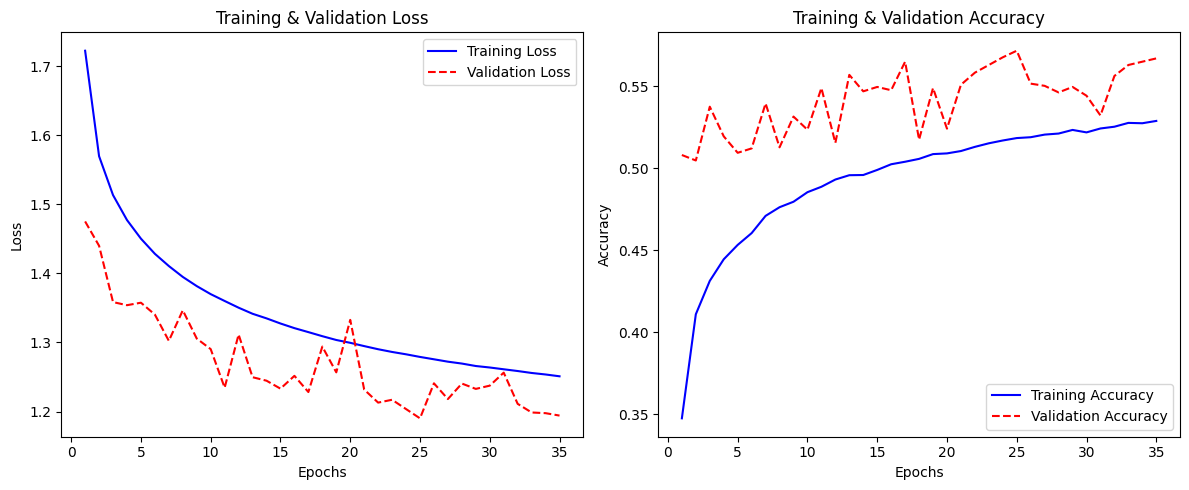

In [15]:
import matplotlib.pyplot as plt
plot_training_history(history=history)

In [16]:
y_pred_probs = model.predict(X_test)              # shape: (n_samples, n_classes)
y_pred = np.argmax(y_pred_probs, axis=1)          # predicted class indices
y_true = np.argmax(y_test, axis=1)

47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step


In [17]:
from sklearn.metrics import classification_report
import pandas as pd
import numpy as np

# Generate dictionary output
report_dict = classification_report(y_true, y_pred, target_names=le.classes_, output_dict=True)

# Convert to DataFrame
report_df = pd.DataFrame(report_dict).transpose()

# Round values for readability
report_df[['precision', 'recall', 'f1-score']] = report_df[['precision', 'recall', 'f1-score']].round(2)

report_df

,precision,recall,f1-score,support
akiec,0.22,0.63,0.33,49.000000
bcc,0.21,0.42,0.28,77.000000
bkl,0.35,0.25,0.29,164.000000
df,0.04,0.18,0.06,17.000000
mel,0.34,0.59,0.43,167.000000
nv,0.93,0.57,0.71,999.000000
vasc,0.12,0.62,0.20,21.000000
accuracy,0.53,0.53,0.53,0.527443
macro avg,0.32,0.46,0.33,1494.000000
weighted avg,0.72,0.53,0.58,1494.000000
